<a href="https://colab.research.google.com/github/ragalaa/Machine-Learning-Basics/blob/master/Linear_regression_Yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FInance: Data from Yahoo to get the Linear regression :

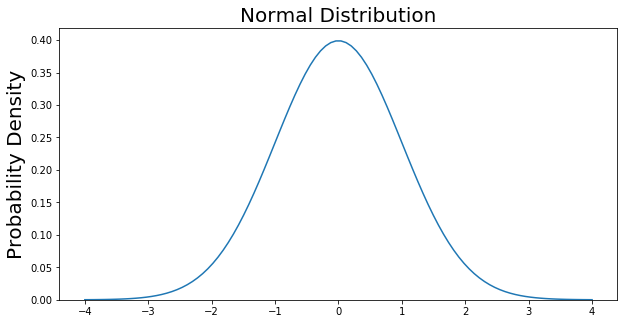

In [59]:
# Import all libraries for this portion of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

In [0]:
# Make PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )


In [61]:
# Integrate PDF from -.6745 to .6745
result_50p, _ = quad(normalProbabilityDensity, -.6745, .6745, limit = 1000)
print(result_50p)

0.5000065142726018


In [62]:
# Integrate PDF from -2.698 to 2.698
result_99_3p, _ = quad(normalProbabilityDensity,
                     -2.698,
                     2.698,
                     limit = 1000)
print(result_99_3p)

0.9930242559336101


In [103]:

import pandas_datareader.data as web
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

google = web.DataReader('GOOG', data_source = 'yahoo', start = '3/14/2009', end = '4/14/2016')
google = google.drop('Volume', axis = 1 )
google.head()

,High,Low,Open,Close,Adj Close
Date,,,,,
2009-03-16,164.249359,158.700150,162.386337,159.248093,159.248093
2009-03-17,167.043884,158.949219,159.492188,167.043884,167.043884
2009-03-18,169.365173,163.412491,166.779861,165.928055,165.928055
2009-03-19,167.372650,163.078735,165.220718,164.353958,164.353958
2009-03-20,165.873260,162.560684,164.533295,164.463547,164.463547


In [104]:

google['Ticks'] = range(0,len(google.index.values))
google.head()

,High,Low,Open,Close,Adj Close,Ticks
Date,,,,,,
2009-03-16,164.249359,158.700150,162.386337,159.248093,159.248093,0
2009-03-17,167.043884,158.949219,159.492188,167.043884,167.043884,1
2009-03-18,169.365173,163.412491,166.779861,165.928055,165.928055,2
2009-03-19,167.372650,163.078735,165.220718,164.353958,164.353958,3
2009-03-20,165.873260,162.560684,164.533295,164.463547,164.463547,4


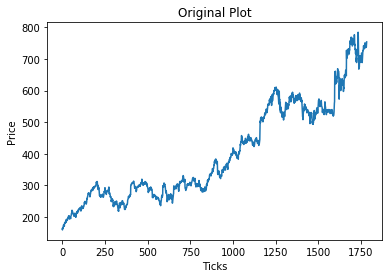

In [106]:
fig = plt.figure(1)
ax =fig.add_subplot(111)
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.set_title('Original Plot')
ax.plot('Ticks','Open',data=google);


In [107]:
one_tenth = google.sample(frac = .1, random_state=np.random.randint(10))
# removing index name
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,High,Low,Open,Close,Adj Close,Ticks
2009-03-18,169.365173,163.412491,166.779861,165.928055,165.928055,2
2009-03-24,176.259338,171.357712,172.603043,172.936783,172.936783,6
2009-04-21,191.432465,187.347778,187.382645,190.022751,190.022751,25
2009-05-11,205.230743,199.850906,200.647919,203.228256,203.228256,39
2009-06-09,219.427536,215.073853,218.471115,216.996643,216.996643,59


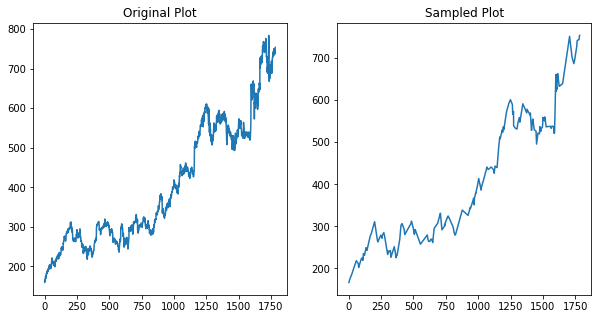

In [108]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Ticks', 'Open', data = google);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled Plot');

In [109]:
google = google.reset_index()

google['Rolling_Mean'] = google['Open'].rolling(window = 20).mean()
google.head(5)

,Date,High,Low,Open,Close,Adj Close,Ticks,Rolling_Mean
0,2009-03-16,164.249359,158.700150,162.386337,159.248093,159.248093,0,NaN
1,2009-03-17,167.043884,158.949219,159.492188,167.043884,167.043884,1,NaN
2,2009-03-18,169.365173,163.412491,166.779861,165.928055,165.928055,2,NaN
3,2009-03-19,167.372650,163.078735,165.220718,164.353958,164.353958,3,NaN
4,2009-03-20,165.873260,162.560684,164.533295,164.463547,164.463547,4,NaN


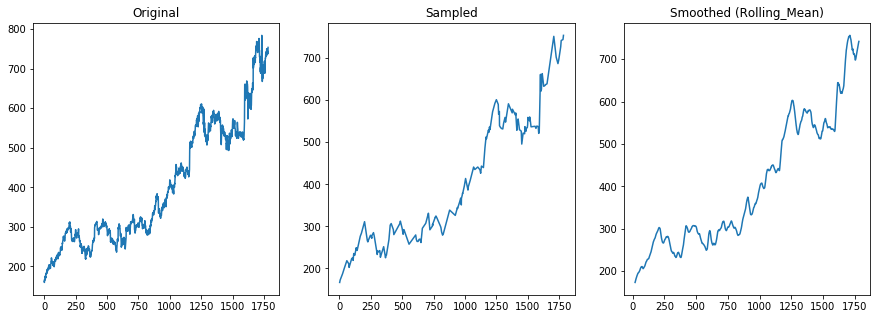

In [110]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = google);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled');
axes[2].plot('Ticks', 'Rolling_Mean', data = google);
axes[2].set_title('Smoothed (Rolling_Mean)');

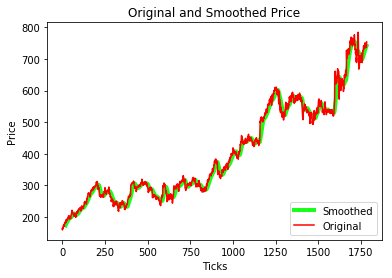

In [111]:
## Overlay one graph on another:

fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(google['Ticks'], google['Rolling_Mean'], color = (0,1,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(google['Ticks'], google['Open'], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [0]:
filt_google = google[(google['Ticks'] >= 800) & (google['Ticks'] <= 1200)]

In [113]:
filt_google.head()

,Date,High,Low,Open,Close,Adj Close,Ticks,Rolling_Mean
800,2012-05-16,313.873535,306.819977,307.826202,313.290710,313.290710,800,301.850592
801,2012-05-17,317.734070,309.455078,315.731567,310.361694,310.361694,801,302.551465
802,2012-05-18,315.029205,297.235901,311.382874,299.078979,299.078979,802,303.070769
803,2012-05-21,306.695435,298.879730,299.133759,305.908386,305.908386,803,303.260307
804,2012-05-22,305.758942,296.887207,305.574646,299.278229,299.278229,804,303.638889


In [122]:
model = LinearRegression().fit(filt_google[['Ticks']], filt_google[['Rolling_Mean']])

m = model.coef_[0]
b = model.intercept_
#equation of the line
print('y = ', round(m[0],2), 'x + ', round(b[0],2))

y =  0.53 x +  -138.4


In [126]:
# using the equation of the line to get y values
predictions = model.predict(filt_google[['Ticks']])
predictions[0:5]


array([[283.1871891],
       [283.7141685],
       [284.2411479],
       [284.7681273],
       [285.2951067]])

In [127]:
# making a DataFrame for the predictions
predictions = pd.DataFrame(data = predictions, index = filt_google.index.values, columns = ['Pred'])
predictions.head()

,Pred
800,283.187189
801,283.714169
802,284.241148
803,284.768127
804,285.295107


In [128]:
joined_df = filt_google.join(predictions, how = 'inner')
joined_df.head()

,Date,High,Low,Open,Close,Adj Close,Ticks,Rolling_Mean,Pred
800,2012-05-16,313.873535,306.819977,307.826202,313.290710,313.290710,800,301.850592,283.187189
801,2012-05-17,317.734070,309.455078,315.731567,310.361694,310.361694,801,302.551465,283.714169
802,2012-05-18,315.029205,297.235901,311.382874,299.078979,299.078979,802,303.070769,284.241148
803,2012-05-21,306.695435,298.879730,299.133759,305.908386,305.908386,803,303.260307,284.768127
804,2012-05-22,305.758942,296.887207,305.574646,299.278229,299.278229,804,303.638889,285.295107


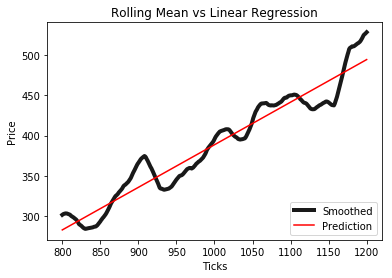

In [129]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(joined_df['Ticks'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(joined_df['Ticks'], joined_df['Pred'], color = (1,0,0), label = 'Prediction');
ax.set_title('Rolling Mean vs Linear Regression')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [130]:
import sklearn
r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'],joined_df['Pred'],multioutput='uniform_average')
r_squared

0.9303563011985321